In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Load the dataset
train_df = pd.read_csv('mnist_train.csv')
test_df = pd.read_csv('mnist_test.csv')

In [ ]:
# Separate features and labels
X_train = train_df.drop('label', axis=1)  # 60,000
y_train = train_df['label']
X_test = test_df.drop('label', axis=1)    # 10,000
y_test = test_df['label']

In [ ]:
# Check for NaNs
print("NaN values in X_train:", np.isnan(train_df).sum())
print("NaN values in X_test:", np.isnan(test_df).sum())

NaN values in X_train: 0        0
1        0
2        0
3        0
4        0
        ..
780      0
781      0
782      0
783      0
label    0
Length: 785, dtype: int64
NaN values in X_test: 0        0
1        0
2        0
3        0
4        0
        ..
780      0
781      0
782      0
783      0
label    0
Length: 785, dtype: int64


In [ ]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Hyperparameter tuning for KNN
knn_params = {'n_neighbors': [3, 5, 7]}
grid_knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=3)
grid_knn.fit(X_train, y_train)
models['K-Nearest Neighbors'] = grid_knn.best_estimator_


In [ ]:
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f'--- {name} ---')
    print(f'Accuracy: {acc:.4f}')
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('Classification Report:\n', classification_report(y_test, y_pred))

--- Logistic Regression ---
Accuracy: 0.9214
Confusion Matrix:
 [[ 948    0    3    4    1   12    6    3    3    0]
 [   0 1108    8    3    0    2    3    1   10    0]
 [  10    9  918   17   11    5   13    7   38    4]
 [   3    1   20  922    2   21    3   11   20    7]
 [   1    4    9    4  914    1    9    7    6   27]
 [  10    5    2   33    9  773   16    8   32    4]
 [   8    4   10    3    5   18  908    1    1    0]
 [   3    8   24    7    6    2    0  942    6   30]
 [  10   12    5   23    8   28    9    8  856   15]
 [   7    7    2    8   19    8    0   23   10  925]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.92      0.89      0.90      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.93      0.93       982
           5       0.89      0.87      0.88       892
  

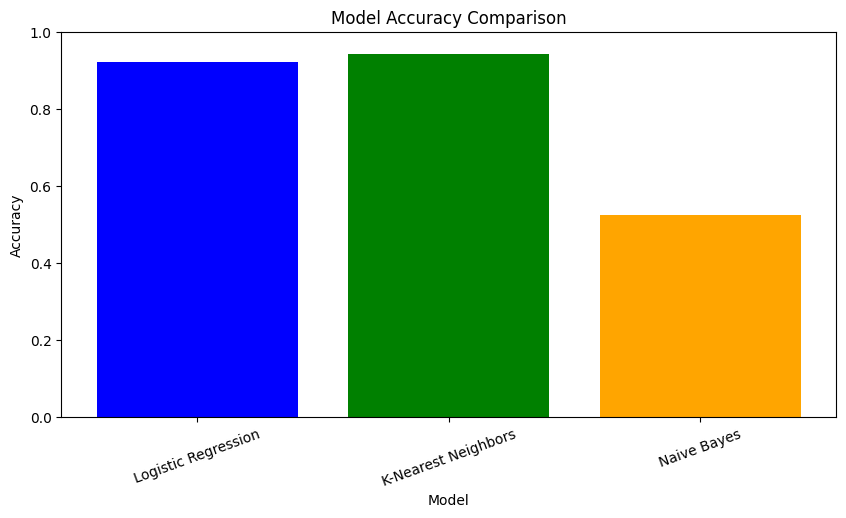

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=20)
plt.show()
